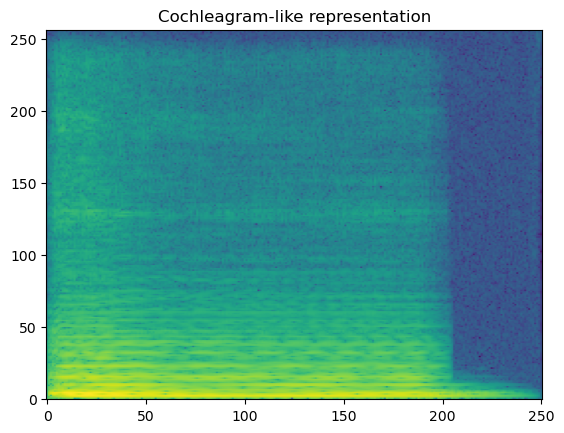

In [4]:
# testing librosa if it makes a cochleagram

import librosa
import numpy as np
import matplotlib.pyplot as plt

y, sr = librosa.load("test.wav", sr=None)
# simple cochleagram approximation using STFT magnitude
S = np.abs(librosa.stft(y, n_fft=512, hop_length=256))
plt.imshow(20*np.log10(S+1e-6), origin='lower', aspect='auto')
plt.title("Cochleagram-like representation")
plt.show()


In [17]:
# wav2vec 2.0 test (is this 1.0 ir 2.0?)

from transformers import Wav2Vec2Processor, Wav2Vec2Model
import torch
import torchaudio

# load pretrained model
processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-base-960h")
model = Wav2Vec2Model.from_pretrained("facebook/wav2vec2-base-960h").cuda()

# load a short audio sample
waveform, sr = torchaudio.load("StarWars60.wav")
waveform = waveform.mean(dim=0)  # stereo -> mono
input_values = processor(waveform.numpy(), sampling_rate=sr, return_tensors="pt").input_values.cuda()

outputs = model(input_values)
print(outputs.last_hidden_state.shape)


2025-08-19 12:17:16.301994: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


preprocessor_config.json:   0%|          | 0.00/159 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/163 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

vocab.json:   0%|          | 0.00/291 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/85.0 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/378M [00:00<?, ?B/s]

Some weights of Wav2Vec2Model were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


RuntimeError: Failed to open the input "StarWars60.wav" (No such file or directory).
Exception raised from get_input_format_context at /__w/_temp/conda_environment_11479468733/conda-bld/torchaudio_1729685474812/work/src/libtorio/ffmpeg/stream_reader/stream_reader.cpp:42 (most recent call first):
frame #0: c10::Error::Error(c10::SourceLocation, std::string) + 0x96 (0x76ec202ea446 in /home/melan/miniconda3/envs/wcas_project/lib/python3.10/site-packages/torch/lib/libc10.so)
frame #1: c10::detail::torchCheckFail(char const*, char const*, unsigned int, std::string const&) + 0x64 (0x76ec202946e4 in /home/melan/miniconda3/envs/wcas_project/lib/python3.10/site-packages/torch/lib/libc10.so)
frame #2: <unknown function> + 0x42134 (0x76eab42bf134 in /home/melan/miniconda3/envs/wcas_project/lib/python3.10/site-packages/torio/lib/libtorio_ffmpeg4.so)
frame #3: torio::io::StreamingMediaDecoder::StreamingMediaDecoder(std::string const&, std::optional<std::string> const&, std::optional<std::map<std::string, std::string, std::less<std::string>, std::allocator<std::pair<std::string const, std::string> > > > const&) + 0x14 (0x76eab42c1b34 in /home/melan/miniconda3/envs/wcas_project/lib/python3.10/site-packages/torio/lib/libtorio_ffmpeg4.so)
frame #4: <unknown function> + 0x3a19e (0x76eab467e19e in /home/melan/miniconda3/envs/wcas_project/lib/python3.10/site-packages/torio/lib/_torio_ffmpeg4.so)
frame #5: <unknown function> + 0x31d47 (0x76eab4675d47 in /home/melan/miniconda3/envs/wcas_project/lib/python3.10/site-packages/torio/lib/_torio_ffmpeg4.so)
frame #6: /home/melan/miniconda3/envs/wcas_project/bin/python() [0x4fd527]
frame #7: _PyObject_MakeTpCall + 0x25b (0x4f701b in /home/melan/miniconda3/envs/wcas_project/bin/python)
frame #8: /home/melan/miniconda3/envs/wcas_project/bin/python() [0x50924a]
frame #9: /home/melan/miniconda3/envs/wcas_project/bin/python() [0x506f4c]
frame #10: /home/melan/miniconda3/envs/wcas_project/bin/python() [0x4f7386]
frame #11: <unknown function> + 0x932a1b (0x76eb39132a1b in /home/melan/miniconda3/envs/wcas_project/lib/python3.10/site-packages/triton/_C/libtriton.so)
frame #12: _PyObject_MakeTpCall + 0x25b (0x4f701b in /home/melan/miniconda3/envs/wcas_project/bin/python)
frame #13: _PyEval_EvalFrameDefault + 0x53ae (0x4f323e in /home/melan/miniconda3/envs/wcas_project/bin/python)
frame #14: _PyObject_FastCallDictTstate + 0xcd (0x4f64fd in /home/melan/miniconda3/envs/wcas_project/bin/python)
frame #15: /home/melan/miniconda3/envs/wcas_project/bin/python() [0x506ab8]
frame #16: _PyObject_MakeTpCall + 0x2ab (0x4f706b in /home/melan/miniconda3/envs/wcas_project/bin/python)
frame #17: _PyEval_EvalFrameDefault + 0x53ae (0x4f323e in /home/melan/miniconda3/envs/wcas_project/bin/python)
frame #18: _PyFunction_Vectorcall + 0x6f (0x4fd96f in /home/melan/miniconda3/envs/wcas_project/bin/python)
frame #19: _PyEval_EvalFrameDefault + 0x31f (0x4ee1af in /home/melan/miniconda3/envs/wcas_project/bin/python)
frame #20: _PyFunction_Vectorcall + 0x6f (0x4fd96f in /home/melan/miniconda3/envs/wcas_project/bin/python)
frame #21: _PyEval_EvalFrameDefault + 0x4b05 (0x4f2995 in /home/melan/miniconda3/envs/wcas_project/bin/python)
frame #22: _PyFunction_Vectorcall + 0x6f (0x4fd96f in /home/melan/miniconda3/envs/wcas_project/bin/python)
frame #23: _PyEval_EvalFrameDefault + 0x4b05 (0x4f2995 in /home/melan/miniconda3/envs/wcas_project/bin/python)
frame #24: /home/melan/miniconda3/envs/wcas_project/bin/python() [0x594312]
frame #25: PyEval_EvalCode + 0x87 (0x594257 in /home/melan/miniconda3/envs/wcas_project/bin/python)
frame #26: /home/melan/miniconda3/envs/wcas_project/bin/python() [0x59b77d]
frame #27: /home/melan/miniconda3/envs/wcas_project/bin/python() [0x4fdb54]
frame #28: _PyEval_EvalFrameDefault + 0x31f (0x4ee1af in /home/melan/miniconda3/envs/wcas_project/bin/python)
frame #29: /home/melan/miniconda3/envs/wcas_project/bin/python() [0x510843]
frame #30: _PyEval_EvalFrameDefault + 0x1b66 (0x4ef9f6 in /home/melan/miniconda3/envs/wcas_project/bin/python)
frame #31: /home/melan/miniconda3/envs/wcas_project/bin/python() [0x510843]
frame #32: _PyEval_EvalFrameDefault + 0x1b66 (0x4ef9f6 in /home/melan/miniconda3/envs/wcas_project/bin/python)
frame #33: /home/melan/miniconda3/envs/wcas_project/bin/python() [0x510843]
frame #34: /home/melan/miniconda3/envs/wcas_project/bin/python() [0x5b1f36]
frame #35: /home/melan/miniconda3/envs/wcas_project/bin/python() [0x507def]
frame #36: _PyEval_EvalFrameDefault + 0x72e (0x4ee5be in /home/melan/miniconda3/envs/wcas_project/bin/python)
frame #37: _PyFunction_Vectorcall + 0x6f (0x4fd96f in /home/melan/miniconda3/envs/wcas_project/bin/python)
frame #38: _PyEval_EvalFrameDefault + 0x31f (0x4ee1af in /home/melan/miniconda3/envs/wcas_project/bin/python)
frame #39: _PyFunction_Vectorcall + 0x6f (0x4fd96f in /home/melan/miniconda3/envs/wcas_project/bin/python)
frame #40: _PyEval_EvalFrameDefault + 0x72e (0x4ee5be in /home/melan/miniconda3/envs/wcas_project/bin/python)
frame #41: /home/melan/miniconda3/envs/wcas_project/bin/python() [0x508dee]
frame #42: PyObject_Call + 0xb8 (0x509798 in /home/melan/miniconda3/envs/wcas_project/bin/python)
frame #43: _PyEval_EvalFrameDefault + 0x2a4f (0x4f08df in /home/melan/miniconda3/envs/wcas_project/bin/python)
frame #44: /home/melan/miniconda3/envs/wcas_project/bin/python() [0x508dee]
frame #45: _PyEval_EvalFrameDefault + 0x13b0 (0x4ef240 in /home/melan/miniconda3/envs/wcas_project/bin/python)
frame #46: /home/melan/miniconda3/envs/wcas_project/bin/python() [0x510843]
frame #47: _PyEval_EvalFrameDefault + 0x1b66 (0x4ef9f6 in /home/melan/miniconda3/envs/wcas_project/bin/python)
frame #48: /home/melan/miniconda3/envs/wcas_project/bin/python() [0x510843]
frame #49: _PyEval_EvalFrameDefault + 0x1b66 (0x4ef9f6 in /home/melan/miniconda3/envs/wcas_project/bin/python)
frame #50: /home/melan/miniconda3/envs/wcas_project/bin/python() [0x510843]
frame #51: _PyEval_EvalFrameDefault + 0x1b66 (0x4ef9f6 in /home/melan/miniconda3/envs/wcas_project/bin/python)
frame #52: /home/melan/miniconda3/envs/wcas_project/bin/python() [0x510843]
frame #53: _PyEval_EvalFrameDefault + 0x1b66 (0x4ef9f6 in /home/melan/miniconda3/envs/wcas_project/bin/python)
frame #54: /home/melan/miniconda3/envs/wcas_project/bin/python() [0x510843]
frame #55: _PyEval_EvalFrameDefault + 0x1b66 (0x4ef9f6 in /home/melan/miniconda3/envs/wcas_project/bin/python)
frame #56: /home/melan/miniconda3/envs/wcas_project/bin/python() [0x510843]
frame #57: <unknown function> + 0x7d5d (0x76ec466cbd5d in /home/melan/miniconda3/envs/wcas_project/lib/python3.10/lib-dynload/_asyncio.cpython-310-x86_64-linux-gnu.so)
frame #58: /home/melan/miniconda3/envs/wcas_project/bin/python() [0x4fcf9b]
frame #59: /home/melan/miniconda3/envs/wcas_project/bin/python() [0x61c0b1]
frame #60: /home/melan/miniconda3/envs/wcas_project/bin/python() [0x4ba475]
frame #61: /home/melan/miniconda3/envs/wcas_project/bin/python() [0x4f599b]
frame #62: _PyEval_EvalFrameDefault + 0x5a2a (0x4f38ba in /home/melan/miniconda3/envs/wcas_project/bin/python)


In [18]:
# testing vggish and wav2vec 2.0

from torchvggish.vggish import VGGish
from torchvggish.vggish_input import wavfile_to_examples

# Initialise model and download weights
urls = {
    "vggish": "https://github.com/harritaylor/torchvggish/releases/download/v0.1/vggish-10086976.pth",
    "pca": "https://github.com/harritaylor/torchvggish/releases/download/v0.1/vggish_pca_params-970eaeb6.pth"
}
embedding_model = VGGish(urls)
embedding_model.eval()

example = wavfile_to_examples("test.wav")
embeddings = embedding_model.forward(example)

embedding = embeddings[0]

print(embedding)


Downloading: "https://github.com/harritaylor/torchvggish/releases/download/v0.1/vggish_pca_params-970eaeb6.pth" to /home/melan/.cache/torch/hub/checkpoints/vggish_pca_params-970eaeb6.pth


HTTPError: HTTP Error 404: Not Found